In [217]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdDepictor
from rdkit.Chem import Draw
from rdkit.Chem import RDConfig
from rdkit.Chem import FragmentCatalog
from rdkit.Chem.Draw import IPythonConsole
rdDepictor.SetPreferCoordGen(True)
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

In [218]:
def attr2tag(attr):
    if attr < 0:
        return -1
    else:
        return 1

In [219]:
pred = pd.read_csv('../predictions/tg_pred.csv')
mainchain = pd.read_csv('analyzed_benzene_rings2.csv')
mainchain_index = 0

for index in range(0, len(pred), 4):
    pred.at[index, 'Importance'] = pred.at[index, 'tg'] - pred.at[index, 'tg']
    pred.at[index+1, 'Importance'] = pred.at[index, 'tg'] - pred.at[index+1, 'tg']
    pred.at[index+2, 'Importance'] = pred.at[index, 'tg'] - pred.at[index+2, 'tg']
    pred.at[index+3, 'Importance'] = pred.at[index, 'tg'] - pred.at[index+3, 'tg']

    pred.at[index, 'sub'] = pred.at[index, 'SMILES']

    if mainchain.at[mainchain_index, 'SMILES_1_location'] == "main_chain" :
        pred.at[index+1, 'sub'] = pred.at[index, 'SMILES_1'] + "/main-chain"
    elif mainchain.at[mainchain_index, 'SMILES_1_location'] == "side_chain" :
        pred.at[index+1, 'sub'] = pred.at[index, 'SMILES_1'] + "/side-chain"
    else:
        pred.at[index+1, 'sub'] = pred.at[index, 'SMILES_1']

    if mainchain.at[mainchain_index, 'SMILES_2_location'] == "main_chain" :
        pred.at[index+2, 'sub'] = pred.at[index, 'SMILES_2'] + "/main-chain"
    elif mainchain.at[mainchain_index, 'SMILES_2_location'] == "side_chain" :
        pred.at[index+2, 'sub'] = pred.at[index, 'SMILES_2'] + "/side-chain"
    else:
        pred.at[index+2, 'sub'] = pred.at[index, 'SMILES_2']

    if mainchain.at[mainchain_index, 'SMILES_3_location'] == "main_chain" :
        pred.at[index+3, 'sub'] = pred.at[index, 'SMILES_3'] + "/main-chain"
    elif mainchain.at[mainchain_index, 'SMILES_3_location'] == "side_chain" :
        pred.at[index+3, 'sub'] = pred.at[index, 'SMILES_3'] + "/side-chain"
    else:
        pred.at[index+3, 'sub'] = pred.at[index, 'SMILES_3']
    
    mainchain_index += 1


In [220]:
# data表示数据集中出现的每个子结构以及对应的重要性
data = pred[['sub', 'Importance']]
data = data[data['Importance'] != 0]

In [221]:
data = data[data['sub'].str.contains('c')]

In [223]:
sub_name_list = data['sub'].tolist()

for sub_name in sub_name_list:
    if len(data[data['sub']==sub_name]) <= 1: # 找出出现9次及以上的子结构
        data = data[data['sub']!=sub_name]


tag_list = [attr2tag(x) for x in data['Importance'].tolist()]
data['tag'] = tag_list

# 将data按照diff进行排序
data = data.sort_values(by='Importance', ascending=True)

In [224]:
sub_name_set = set(data['sub'].tolist())

sub_atrr_average = {}

for sub_name in sub_name_set:
    sub_data = data[data['sub']==sub_name]
    sub_atrr_average[sub_name] = sub_data['Importance'].mean()



summary_data = pd.DataFrame.from_dict(sub_atrr_average, orient='index', columns=['importance'])
summary_data = summary_data.reset_index().rename(columns={'index':'sub'})
summary_data = summary_data.sort_values(by='importance', ascending=True)
summary_data = summary_data.reset_index(drop=True)
filter_sub_name_list = summary_data['sub'].tolist()

In [226]:
summary_data

,sub,importance
0,[CH2]=[CH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/main...,12.924899
1,[cH]1:[cH]:[c]:[cH]:[c]:[cH]:1/main-chain,15.823161
2,[cH]1:[cH]:[c]:[cH]:[cH]:[cH]:1/main-chain,17.991718
3,[cH]1:[cH]:[c]:[cH]:[c]:[cH]:1/side-chain,22.207563
4,[cH]1:[cH]:[c]:[c]:[cH]:[cH]:1/main-chain,24.244760
5,[cH]1:[cH]:[c]:[cH]:[cH]:[c]:1/main-chain,28.259780
6,[cH]1:[cH]:[c]:[cH]:[cH]:[c]:1/side-chain,29.859085
7,[Br]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/main-chain,30.003600
8,[c]1:[cH]:[c]:[c]:[cH]:[cH]:1/main-chain,31.143861
9,[OH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/side-chain,36.381008


In [228]:
data

,sub,Importance,tag
411,[CH2]=[CH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/main...,12.564920,1
875,[CH2]=[CH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/main...,12.675760,1
403,[CH2]=[CH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/main...,12.901557,1
335,[CH2]=[CH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/main...,13.144403,1
379,[CH2]=[CH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/main...,13.337855,1
...,...,...,...
586,[OH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/side-chain,38.817252,1
818,[OH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/side-chain,39.244359,1
822,[OH]-[c]1:[cH]:[cH]:[c]:[cH]:[cH]:1/side-chain,39.374951,1
765,[cH]1:[cH]:[c]:[cH]:[cH]:[c]:1/main-chain,39.480549,1


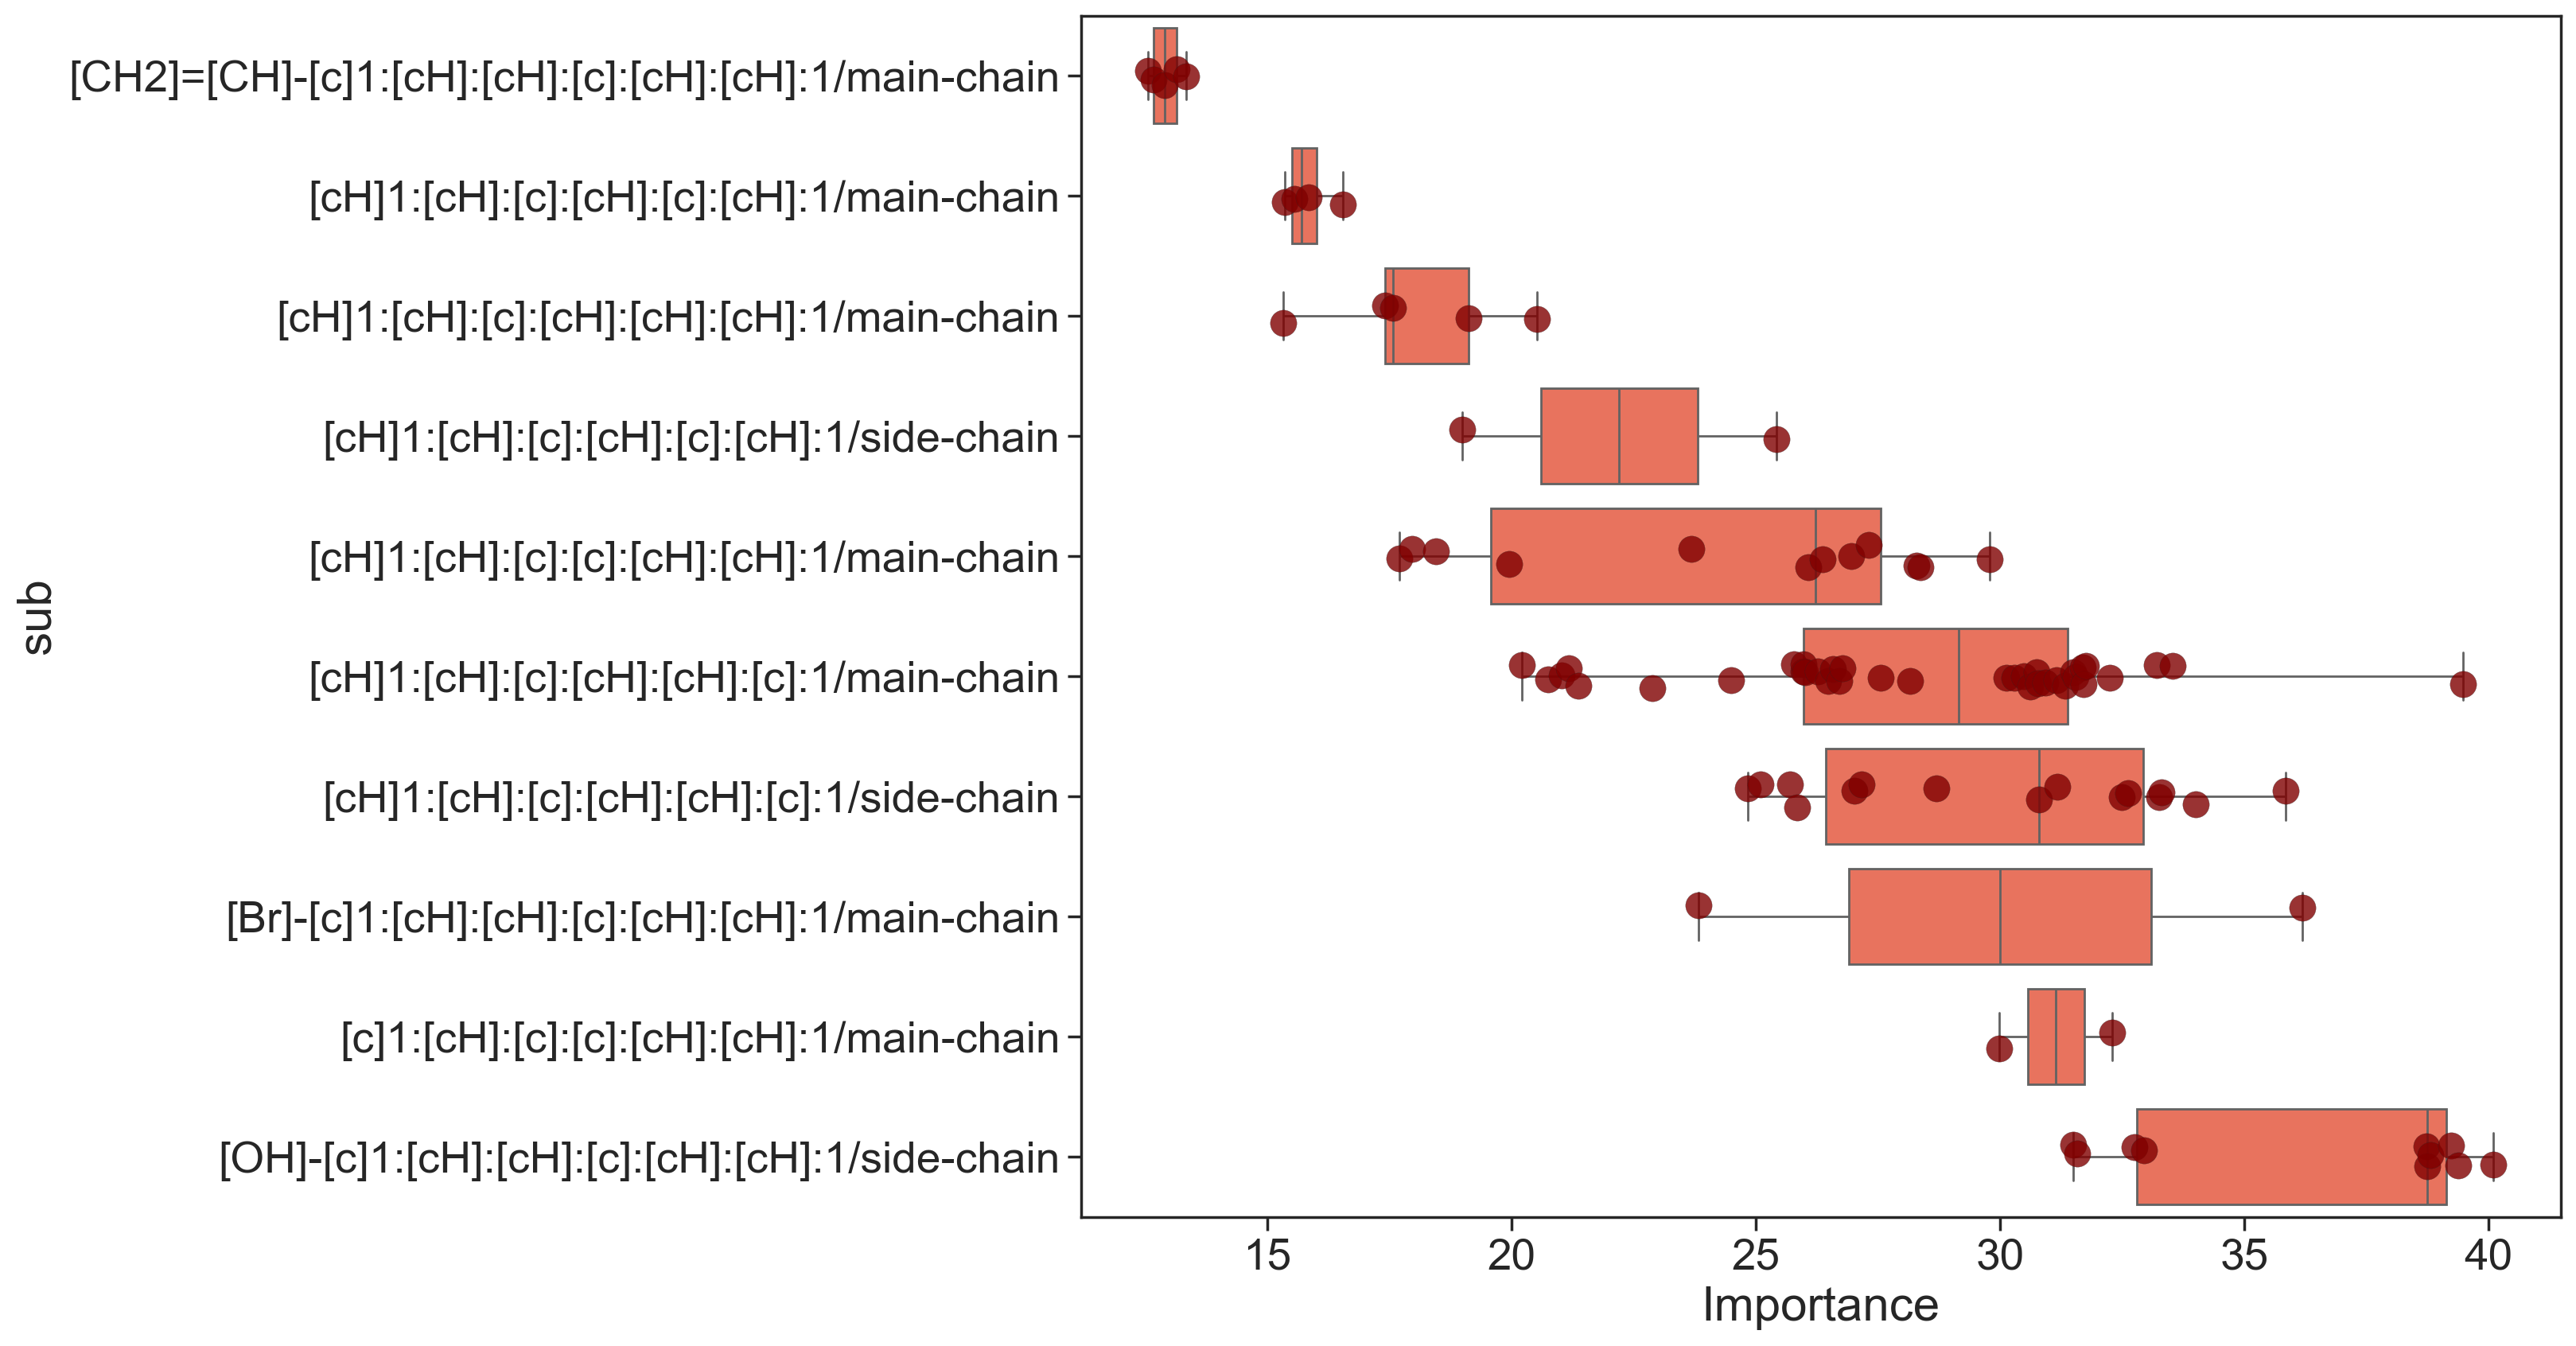

In [225]:
# colors = sns.color_palette('pastel6', 2)
fig = plt.figure(figsize=(12, 10), dpi=200)
sns.set_theme(font_scale=1.8, style='ticks')

atribution_x_cor=-55


g = sns.stripplot(y='sub', x='Importance', data=data, alpha=0.8, size=12, dodge=True, order=filter_sub_name_list, linewidth=0.1, color='maroon')

# g = sns.violinplot(y='sub', x='Importance', data=data, order=filter_sub_name_list, split=True, inner='quartile', density_norm='width')



g = sns.boxplot(y='sub', x='Importance', data=data, order=filter_sub_name_list, showfliers=False, color='tomato')

# # g.set_yticklabels([])  # 设置y轴标签为空值

# g.text(atribution_x_cor, -0.8,  'Average \n Importance', color="Black",  ha="center")
# g.set_xlim(-60, 50)

# for index, row in summary_data.iterrows():
#     if row.importance <= 0:
#         g.text(atribution_x_cor, index+0.1, round(row.importance, 2), color="b",  ha="center")
#     else:
#         g.text(atribution_x_cor, index+0.1, round(row.importance, 2), color="r",  ha="center")

# plt.legend([],[], frameon=False)

# font2 = {'weight' : 'normal',
#         'size'   : 25,
#         }
# plt.ylabel('Substructures', font2)
# plt.xlabel('Importance', font2)
# plt.axvline(0, color="black", linestyle = '--', alpha = 0.8) #竖线
plt.savefig('substructure_importance.png', dpi=500, bbox_inches='tight')

---

In [169]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdmolops

In [170]:
def is_benzene_ring(smiles):
    return 'c' in smiles

def get_main_chain_atoms(mol):
    atom_count = mol.GetNumAtoms()
    main_chain_atoms = rdmolops.GetShortestPath(mol, 0, atom_count - 1)
    return list(main_chain_atoms)

In [171]:
def is_on_main_chain(atom_indices, main_chain_atoms):
    if any(atom_idx in main_chain_atoms for atom_idx in atom_indices):
        return "main_chain"
    return "side_chain"

In [172]:
def analyze_smiles(df):
    results = []
    
    for index, row in df.iterrows():
        cano_smi = Chem.MolToSmiles(Chem.MolFromSmiles(row['SMILES']))
        mol = Chem.MolFromSmiles(cano_smi)
        if mol is None:
            continue  # 跳过无效的SMILES

        # 获取主链上的原子索引
        main_chain_atoms = get_main_chain_atoms(mol)

        for i in range(1, 4):  # 假设有三个子结构需要检查
            sub_smiles = row[f'SMILES_{i}']
            atom_indices = row[f'SMILES_{i}_atom']

            # 判断是否为苯环
            if is_benzene_ring(sub_smiles):
                # 判断苯环是否在主链上
                location = is_on_main_chain(atom_indices, main_chain_atoms)
                df.at[index, f'SMILES_{i}_location'] = location
            else:
                df.at[index, f'SMILES_{i}_location'] = "not_benzene"

    return df

In [174]:
# 读取CSV文件
file_path = "tg_sub_with_atom.csv"  # 替换为你的数据集路径
df = pd.read_csv(file_path)

# 需要将原子索引列表从字符串解析为列表
for i in range(1, 4):
    df[f'SMILES_{i}_atom'] = df[f'SMILES_{i}_atom'].apply(eval)

# 分析数据集
result_df = analyze_smiles(df)

# 保存结果
result_df.to_csv("analyzed_benzene_rings2.csv", index=False)